### RLab05 - Martina Cacciola (2097476)

# Exercise 1

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### a)

Observation 1:
Posterior mean: 0.615 
Posterior median: 0.6133613 
Posterior variance: 0.003075 
95% credibility interval: 0.025 0.975 

Observation 2:
Posterior mean: 0.7035714 
Posterior median: 0.7023702 
Posterior variance: 0.002512749 
95% credibility interval: 0.025 0.975 



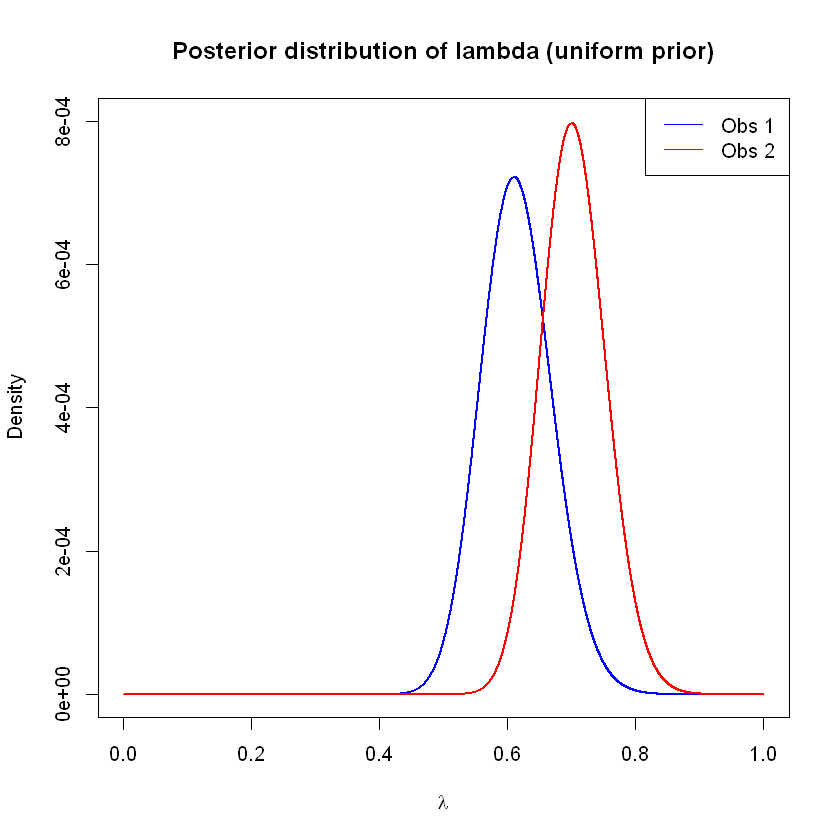

In [2]:
# Data
y <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

# Uniform Prior
lambda <- seq(0, 1, length.out = 10000)
prior <- rep(1/length(lambda), length(lambda))

# Likelihood
likelihood1 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n1))
likelihood2 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n2))

# Posterior
posterior1 <- likelihood1 * prior
posterior1 <- posterior1 / sum(posterior1)
posterior2 <- likelihood2 * prior
posterior2 <- posterior2 / sum(posterior2)

# Plot posterior
plot(lambda, posterior1, type = "l", col = "blue", lwd = 2,
     xlab = expression(lambda), ylab = "Density",
     main = "Posterior distribution of lambda (uniform prior)", ylim = c(0, 8*10^-4))
lines(lambda, posterior2, col = "red", lwd = 2)
legend("topright", legend = c("Obs 1", "Obs 2"),
       col = c("blue", "red"), lty = 1)

# Posterior mean
mean1 <- sum(lambda * posterior1)
mean2 <- sum(lambda * posterior2)

# Posterior median
cum_posterior1 <- cumsum(posterior1)
median1 <- lambda[which.max(cum_posterior1 >= 0.5)]
cum_posterior2 <- cumsum(posterior2)
median2 <- lambda[which.max(cum_posterior2 >= 0.5)]

# Posterior variance
variance1 <- sum((lambda - mean1)^2 * posterior1)
variance2 <- sum((lambda - mean2)^2 * posterior2)

# Credibility interval
ci1 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior1)
ci2 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior2)

cat("Observation 1:\n")
cat("Posterior mean:", mean1,"\n")
cat("Posterior median:", median1,"\n")
cat("Posterior variance:", variance1,"\n")
cat("95% credibility interval:", ci1,"\n\n")

cat("Observation 2:\n")
cat("Posterior mean:", mean2,"\n")
cat("Posterior median:", median2,"\n")
cat("Posterior variance:", variance2,"\n")
cat("95% credibility interval:", ci2,"\n\n")

### b)

Observation 1:
Posterior mean: 0.6125 
Posterior median: 0.6108611 
Posterior variance: 0.0030625 
95% credibility interval: 0.025 0.975 

Observation 2:
Posterior mean: 0.7017857 
Posterior median: 0.7005701 
Posterior variance: 0.002506372 
95% credibility interval: 0.025 0.975 



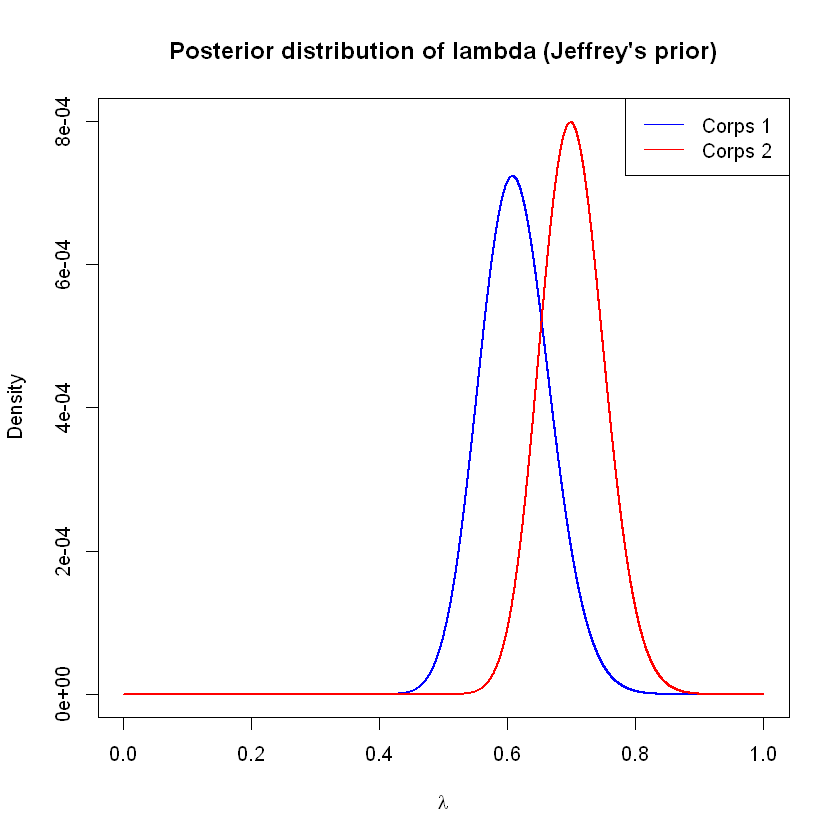

In [3]:
# Data
y <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

# Jeffreys' Prior
lambda <- seq(0, 1, length.out = 10000)
prior <- 1/sqrt(lambda)
prior[is.infinite(prior)] <- 0  # Set infinite values to zero
prior <- prior / sum(prior)  # Normalize the prior probabilities

# Likelihood
likelihood1 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n1))
likelihood2 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n2))

# Posterior
posterior1 <- likelihood1 * prior
posterior1 <- posterior1 / sum(posterior1)
posterior2 <- likelihood2 * prior
posterior2 <- posterior2 / sum(posterior2)

# Plot posterior
plot(lambda, posterior1, type = "l", col = "blue", lwd = 2,
     xlab = expression(lambda), ylab = "Density",
     main = "Posterior distribution of lambda (Jeffrey's prior)", ylim = c(0, 8*10^-4))
lines(lambda, posterior2, col = "red", lwd = 2)
legend("topright", legend = c("Corps 1", "Corps 2"),
       col = c("blue", "red"), lty = 1)

# Posterior mean
mean1 <- sum(lambda * posterior1)
mean2 <- sum(lambda * posterior2)

# Posterior median
cum_posterior1 <- cumsum(posterior1)
median1 <- lambda[which.max(cum_posterior1 >= 0.5)]
cum_posterior2 <- cumsum(posterior2)
median2 <- lambda[which.max(cum_posterior2 >= 0.5)]

# Posterior variance
variance1 <- sum((lambda - mean1)^2 * posterior1)
variance2 <- sum((lambda - mean2)^2 * posterior2)

# Credibility interval
ci1 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior1)
ci2 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior2)

cat("Observation 1:\n")
cat("Posterior mean:", mean1,"\n")
cat("Posterior median:", median1,"\n")
cat("Posterior variance:", variance1,"\n")
cat("95% credibility interval:", ci1,"\n\n")

cat("Observation 2:\n")
cat("Posterior mean:", mean2,"\n")
cat("Posterior median:", median2,"\n")
cat("Posterior variance:", variance2,"\n")
cat("95% credibility interval:", ci2,"\n\n")

# Exercise 2

In [2]:
Sys.setenv(PATH = "C:\\Program Files\\JAGS\\JAGS-4.1.0\\x64\\bin")

In [3]:
Sys.setenv(JAGS_HOME="C:\\Program Files\\JAGS\\JAGS-4.1.0")

In [4]:
install.packages("rjags", type = "binary")
install.packages("runjags", type = "binary")


  C'è una versione binaria disponibile (e sarà installata) ma la
  versione dei sorgenti è successiva:
      binary source
rjags   4-13   4-14

package 'rjags' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpIFLdJA\downloaded_packages
package 'runjags' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpIFLdJA\downloaded_packages


In [5]:
Sys.getenv("PATH")

[1] "C:\\Program Files\\JAGS\\JAGS-4.1.0\\x64\\bin"

In [6]:
library(rjags)
library(runjags)

Caricamento del pacchetto richiesto: coda

Linked to JAGS 4.1.0

Loaded modules: basemod,bugs


Caricamento pacchetto: 'runjags'


Il seguente oggetto è mascherato da 'package:tidyr':

    extract




### a) Uniform prior

In [7]:
# Set the data
X1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
data_1 <- NULL
data_1$X <- X1

X2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))
data_2 <- NULL
data_2$X <- X2

# Create the JAGS model
model <- "model.txt"

# Initialize the model with the first data set
jm_1 <- jags.model(model, data_1)

# Initialize the model with the second data set
jm_2 <- jags.model(model, data_2)

# Update the Markov chain (burn-in) and plot
update(jm_1, 1000)
chain_1 <- coda.samples(jm_1, c("lambda", "Y"), n.iter = 10000)

update(jm_2, 1000)
chain_2 <- coda.samples(jm_2, c("lambda", "Y"), n.iter = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 203

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 283

Initializing model



Observation 1: 
Mean:  0.615 
Variance:  9.455625e-06 
Median: 0.6133613 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6156 0.78721 0.0078721      0.0078721
lambda 0.6153 0.05451 0.0005451      0.0005451

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
Y      0.0000 0.0000 0.0000 1.0000 2.0000
lambda 0.5134 0.5773 0.6131 0.6508 0.7264



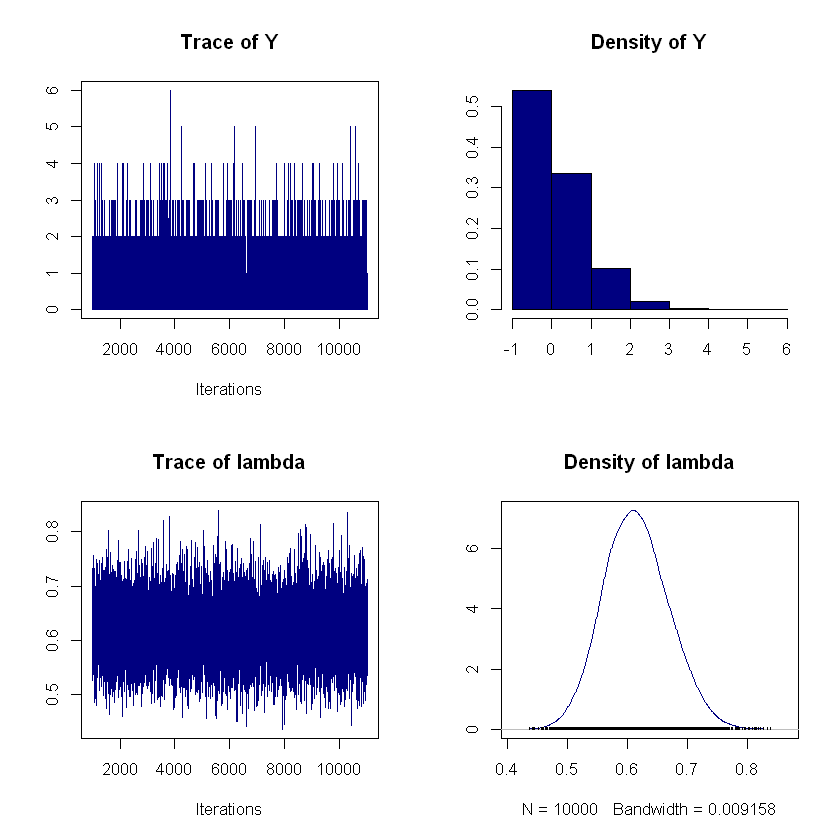

In [8]:
# Plot for observation 1
mean_1 <- 0.615 
var_1 <- 0.003075**2
median_1 <- 0.6133613

cat('Observation 1:', '\n')
cat('Mean: ', mean_1, '\n')
cat('Variance: ', var_1, '\n')
cat('Median:', median_1, '\n')

print(summary(chain_1))
plot(chain_1, col='navy') 

Observation 2: 
Mean: 0.7035714 
Variance:  6.313908e-06 
Median: 0.7023702 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.7251 0.84522 0.0084522      0.0082990
lambda 0.7028 0.05033 0.0005033      0.0005108

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
Y      0.0000 0.0000 1.0000 1.0000 3.0000
lambda 0.6089 0.6686 0.7011 0.7357 0.8066



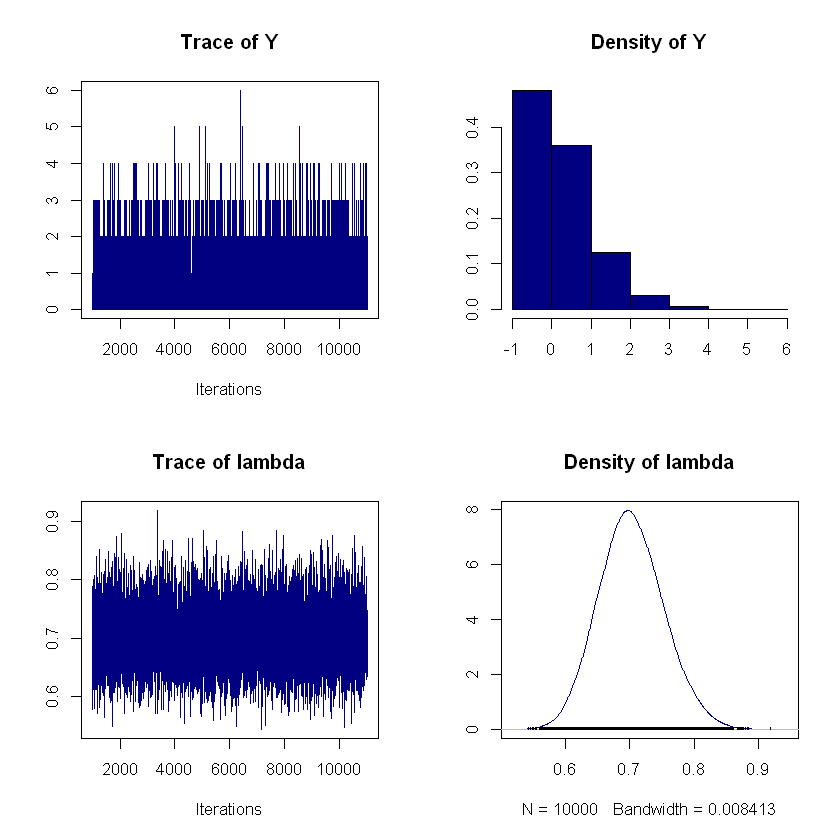

In [9]:
# Plot for observation 2
mean_2 <- 0.7035714 
var_2 <- 0.002512749**2
median_2 <- 0.7023702

cat('Observation 2:', '\n')
cat('Mean:', mean_2, '\n')
cat('Variance: ', var_2, '\n')
cat('Median:', median_2, '\n')

print(summary(chain_2))
plot(chain_2, col='navy')

In [11]:
# Install the gridExtra package
install.packages("gridExtra")

# Load the gridExtra package
library(gridExtra)

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpIFLdJA\downloaded_packages



Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




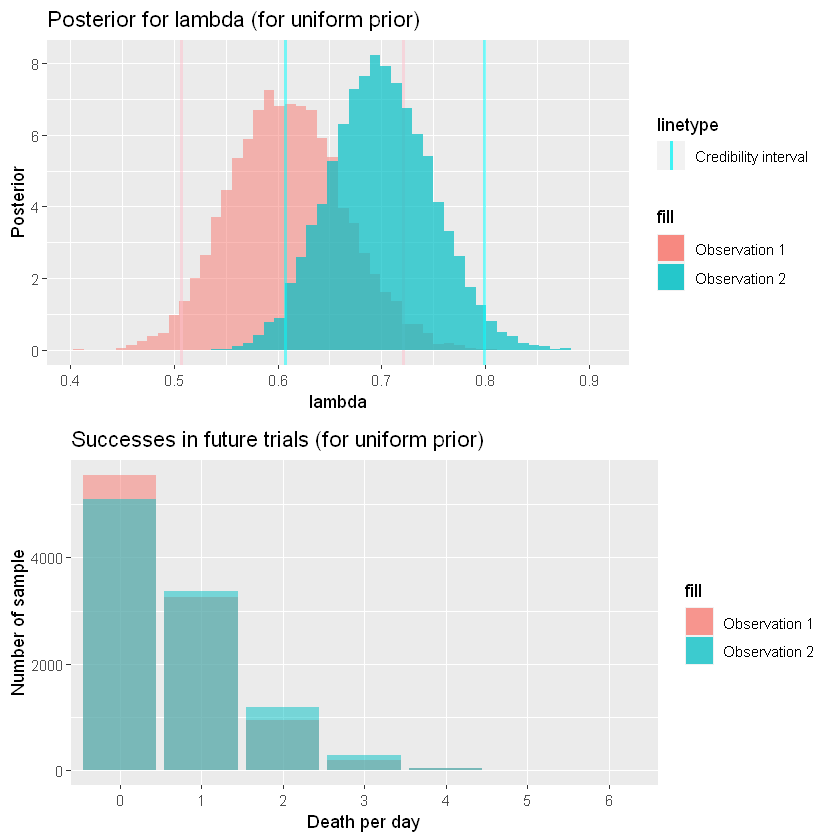

In [28]:
# Format the chain as data frames
chain_1.df <- as.data.frame(as.mcmc(chain_1))
chain_2.df <- as.data.frame(as.mcmc(chain_2))

# Compute the 95% credibility interval for chain 1
sorted_1 <- chain_1.df[order(chain_1.df$lambda), ]$lambda
lower_1 <- as.double(sorted_1[250])
upper_1 <- as.double(sorted_1[9750])

# Compute the 95% credibility interval for chain 2
sorted_2 <- chain_2.df[order(chain_2.df$lambda), ]$lambda
lower_2 <- as.double(sorted_2[250])
upper_2 <- as.double(sorted_2[9750])

# Add the inference result 
ggplot()+
geom_histogram(aes(x=chain_1.df$lambda, y=after_stat(density), fill='Observation 1'), alpha=0.5, bins=50)+
geom_vline(aes(xintercept=lower_1, linetype='Credibility interval'), color='pink', alpha=0.5, lwd=1)+
geom_vline(aes(xintercept=upper_1, linetype='Credibility interval'), color='pink', alpha=0.5, lwd=1)+
geom_histogram(aes(x=chain_2.df$lambda, y=after_stat(density), fill='Observation 2'), alpha=0.7, bins=50)+
geom_vline(aes(xintercept=lower_2, linetype='Credibility interval'), color='cyan', alpha=0.5, lwd=1)+
geom_vline(aes(xintercept=upper_2, linetype='Credibility interval'), color='cyan', alpha=0.5, lwd=1)+
labs(x='lambda', y='Posterior'
     , title='Posterior for lambda (for uniform prior)') -> plot_inference

# Generate future predictions
ty_1 <- as.data.frame(table(chain_1.df$Y))
ty_2 <- as.data.frame(table(chain_2.df$Y))

ggplot()+
geom_bar(aes(x = ty_1$Var1, y=ty_1$Freq, fill='Observation 1'), alpha=0.5, stat = 'identity')+
geom_bar(aes(x = ty_2$Var1, y=ty_2$Freq, fill='Observation 2'), alpha=0.5, stat = 'identity')+
labs(x='Death per day', y='Number of sample', 
     title=sprintf('Successes in future trials (for uniform prior)')) -> plot_prediction

#Correlation between p and predicted variable (toglierei)
#ggplot()+
#geom_point(aes(x=chain_1.df$lambda, y=chain_1.df$Y, color='Observation 1'), shape='+', size=2, alpha=0.5)+
#geom_point(aes(x=chain_2.df$lambda, y=chain_2.df$Y, color='Observation 2'), shape='+', size=2, alpha=0.5)+
#xlim(0, 1)+
#labs(x='lambda', y='Death',
     #title ='Correlation between p and predicted variable') -> plot_correlations

grid.arrange(grobs=list(plot_inference, plot_prediction), nrow=2)

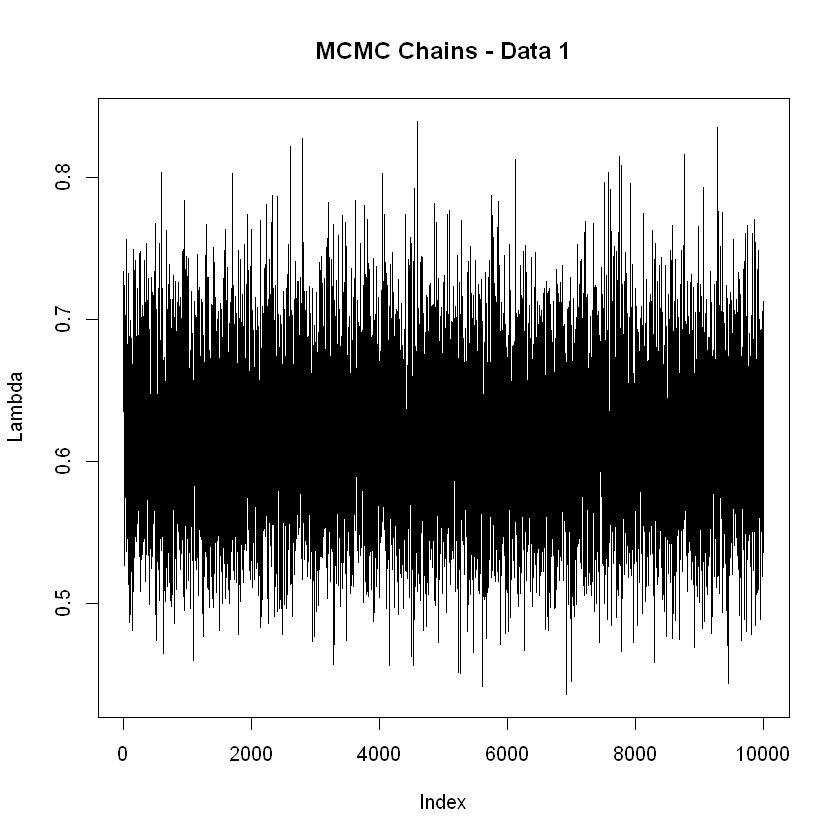

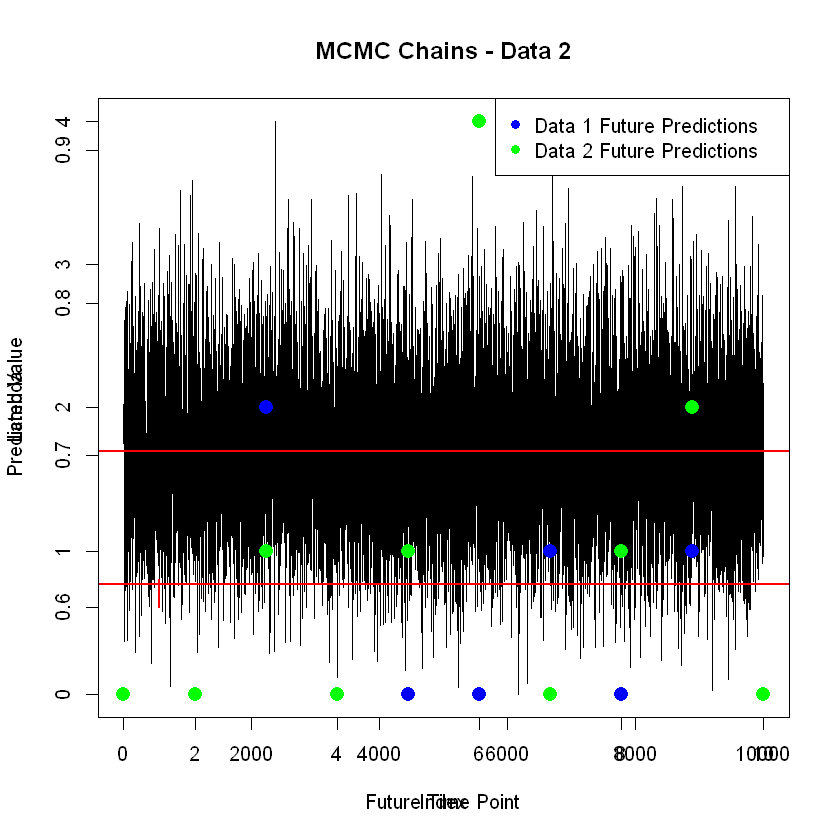

In [14]:
# Format the chain as data frames
chain_1.df <- as.data.frame(as.mcmc(chain_1))
chain_2.df <- as.data.frame(as.mcmc(chain_2))

# Compute the 95% credibility interval for chain 1
sorted_chain_1 <- chain_1.df[order(chain_1.df$lambda), ]$lambda
lower_bound_1_MCMC <- as.double(sorted_chain_1[250])
upper_bound_1_MCMC <- as.double(sorted_chain_1[9750])

# Compute the 95% credibility interval for chain 2
sorted_chain_2 <- chain_2.df[order(chain_2.df$lambda), ]$lambda
lower_bound_2_MCMC <- as.double(sorted_chain_2[250])
upper_bound_2_MCMC <- as.double(sorted_chain_2[9750])

# Plot the MCMC chains
plot(chain_1.df$lambda, type = "l", main = "MCMC Chains - Data 1", ylab = "Lambda")
plot(chain_2.df$lambda, type = "l", main = "MCMC Chains - Data 2", ylab = "Lambda")

# Add the inference result
abline(h = c(mean(chain_1.df$lambda), mean(chain_2.df$lambda)), col = "red", lwd = 2)

# Generate future predictions
N <- 10  # Number of future predictions
future_pred_1 <- rpois(N, mean(chain_1.df$lambda))
future_pred_2 <- rpois(N, mean(chain_2.df$lambda))

# Plot the future predictions
par(new = TRUE)
plot(1:N, future_pred_1, type = "n", xlab = "Future Time Point", ylab = "Predicted Value", ylim = range(future_pred_1, future_pred_2))
points(1:N, future_pred_1, pch = 16, col = "blue", cex = 1.5)
points(1:N, future_pred_2, pch = 16, col = "green", cex = 1.5)
legend("topright", legend = c("Data 1 Future Predictions", "Data 2 Future Predictions"), col = c("blue", "green"), pch = 16)

# Add credibility intervals to the plot
segments(0.5, lower_1, 0.5, upper_1, col = "red", lwd = 2)
segments(1.5, lower_2, 1.5, upper_2, col = "red", lwd = 2)

### b) Jeffrey's prior

In [18]:
# Set the data
X1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
data_1 <- NULL
data_1$X <- X1

X2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))
data_2 <- NULL
data_2$X <- X2

# Create the JAGS model
model <- "model_jeffrey.txt"

# Initialize the model with the first data set
jm_1 <- jags.model(model, data_1)

# Initialize the model with the second data set
jm_2 <- jags.model(model, data_2)

# Update the Markov chain (burn-in) and plot
update(jm_1, 1000)
chain_1 <- coda.samples(jm_1, c("lambda", "Y"), n.iter = 10000)

update(jm_2, 1000)
chain_2 <- coda.samples(jm_2, c("lambda", "Y"), n.iter = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 204

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 284

Initializing model



Observation 1: 
Mean:  0.6125 
Variance:  9.378906e-06 
Median: 0.610861 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.5903 0.77492 0.0077492      0.0077492
lambda 0.6093 0.05502 0.0005502      0.0005502

2. Quantiles for each variable:

         2.5%   25%    50%    75%  97.5%
Y      0.0000 0.000 0.0000 1.0000 2.0000
lambda 0.5066 0.571 0.6079 0.6458 0.7208



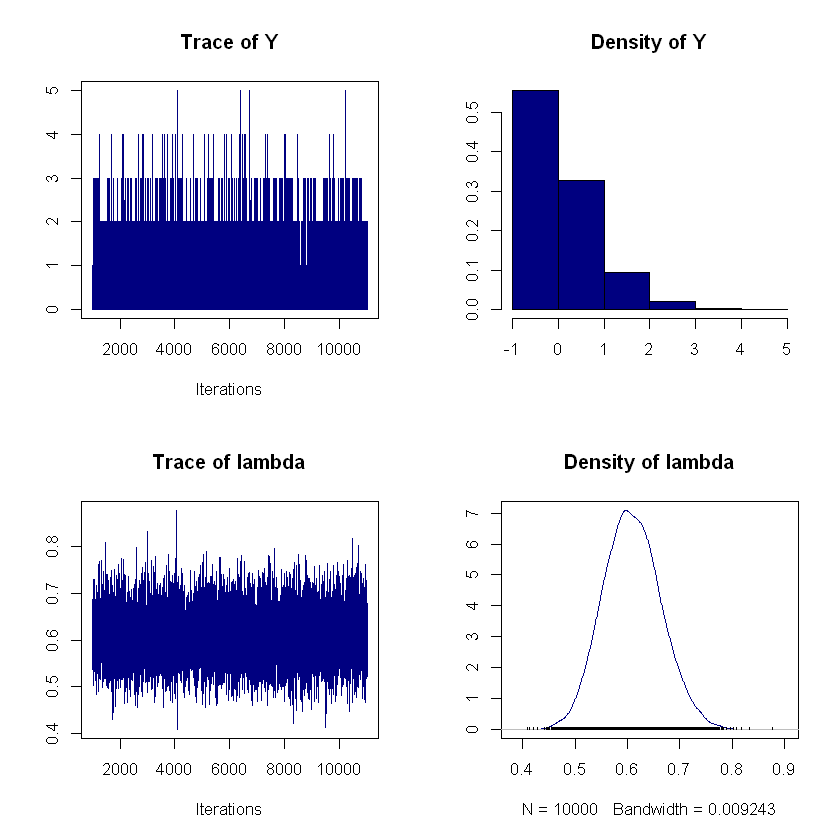

In [19]:
# Plot for observation 1
mean_1 <- 0.6125 
var_1 <- 0.0030625**2
median_1 <- 0.610861

cat('Observation 1:', '\n')
cat('Mean: ', mean_1, '\n')
cat('Variance: ', var_1, '\n')
cat('Median:', median_1, '\n')

print(summary(chain_1))
plot(chain_1, col='navy') 

Observation 2: 
Mean: 0.7017857 
Variance:  6.281901e-06 
Median: 0.7005701 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6829 0.83655 0.0083655      0.0083655
lambda 0.7001 0.04967 0.0004967      0.0004967

2. Quantiles for each variable:

         2.5%   25%    50%    75%  97.5%
Y      0.0000 0.000 0.0000 1.0000 3.0000
lambda 0.6071 0.666 0.6989 0.7338 0.7994



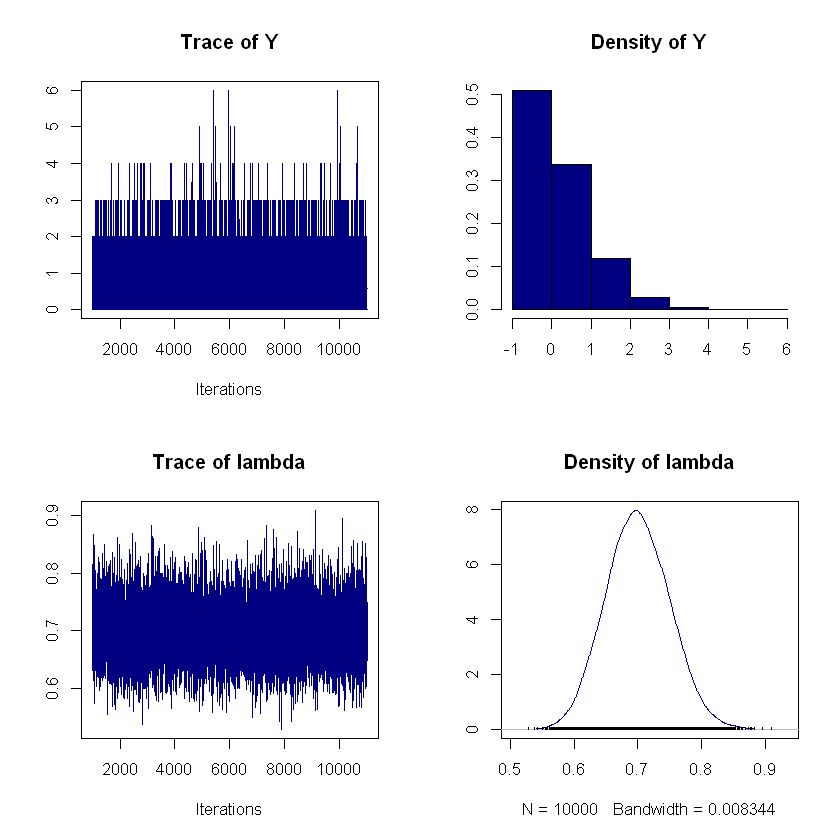

In [20]:
# Plot for observation 2
mean_2 <- 0.7017857 
var_2 <- 0.002506372**2
median_2 <- 0.7005701

cat('Observation 2:', '\n')
cat('Mean:', mean_2, '\n')
cat('Variance: ', var_2, '\n')
cat('Median:', median_2, '\n')

print(summary(chain_2))
plot(chain_2, col='navy')

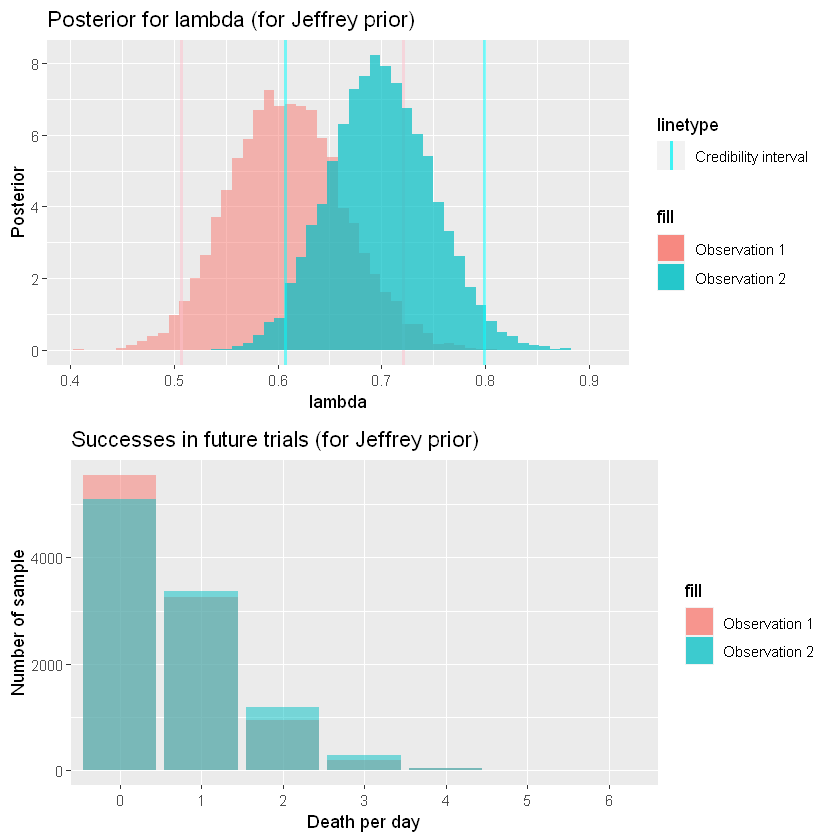

In [27]:
# Format the chain as data frames
chain_1.df <- as.data.frame(as.mcmc(chain_1))
chain_2.df <- as.data.frame(as.mcmc(chain_2))

# Compute the 95% credibility interval for chain 1
sorted_1 <- chain_1.df[order(chain_1.df$lambda), ]$lambda
lower_1 <- as.double(sorted_1[250])
upper_1 <- as.double(sorted_1[9750])

# Compute the 95% credibility interval for chain 2
sorted_2 <- chain_2.df[order(chain_2.df$lambda), ]$lambda
lower_2 <- as.double(sorted_2[250])
upper_2 <- as.double(sorted_2[9750])

# Add the inference result 
ggplot()+
geom_histogram(aes(x=chain_1.df$lambda, y=after_stat(density), fill='Observation 1'), alpha=0.5, bins=50)+
geom_vline(aes(xintercept=lower_1, linetype='Credibility interval'), color='pink', alpha=0.5, lwd=1)+
geom_vline(aes(xintercept=upper_1, linetype='Credibility interval'), color='pink', alpha=0.5, lwd=1)+
geom_histogram(aes(x=chain_2.df$lambda, y=after_stat(density), fill='Observation 2'), alpha=0.7, bins=50)+
geom_vline(aes(xintercept=lower_2, linetype='Credibility interval'), color='cyan', alpha=0.5, lwd=1)+
geom_vline(aes(xintercept=upper_2, linetype='Credibility interval'), color='cyan', alpha=0.5, lwd=1)+
labs(x='lambda', y='Posterior'
     , title='Posterior for lambda (for Jeffrey prior)') -> plot_inference

# Generate future predictions
ty_1 <- as.data.frame(table(chain_1.df$Y))
ty_2 <- as.data.frame(table(chain_2.df$Y))

ggplot()+
geom_bar(aes(x = ty_1$Var1, y=ty_1$Freq, fill='Observation 1'), alpha=0.5, stat = 'identity')+
geom_bar(aes(x = ty_2$Var1, y=ty_2$Freq, fill='Observation 2'), alpha=0.5, stat = 'identity')+
labs(x='Death per day', y='Number of sample', 
     title=sprintf('Successes in future trials (for Jeffrey prior)')) -> plot_prediction

#Correlation between p and predicted variable (toglierei)
#ggplot()+
#geom_point(aes(x=chain_1.df$lambda, y=chain_1.df$Y, color='Observation 1'), shape='+', size=2, alpha=0.5)+
#geom_point(aes(x=chain_2.df$lambda, y=chain_2.df$Y, color='Observation 2'), shape='+', size=2, alpha=0.5)+
#xlim(0, 1)+
#labs(x='lambda', y='Death',
     #title ='Correlation between p and predicted variable') -> plot_correlations

grid.arrange(grobs=list(plot_inference, plot_prediction), nrow=2)

# Exercise 3

### a)

In [3]:
n <- 116
y <- 11
# probability (frequentist estimator) 
p <- y/n
cat("The frequentist estimation for p is:", p*100, "%")

The frequentist estimation for p is: 9.482759 %

### b)

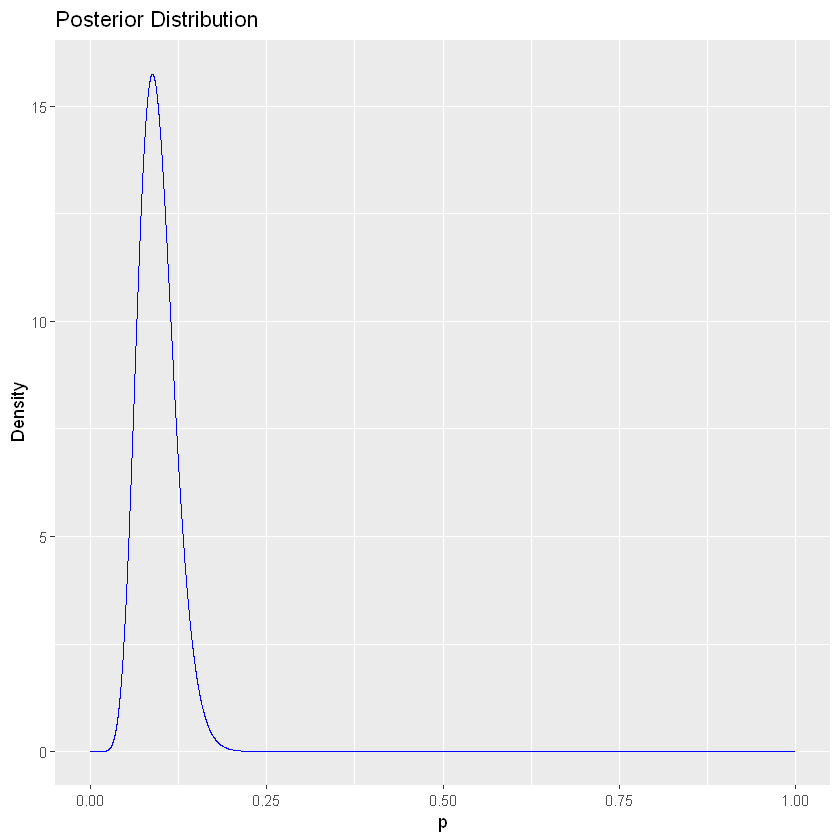

In [39]:
# Parameters
alpha <- 1
beta <- 10
step <- 0.0001
p <- seq(0, 1, by = step)

# Likelihood and prior
like <- dbinom(y, size=n, prob=p)
prior <- dbeta(p, alpha, beta)

# Posterior
post_unorm <- like*prior
post <- post_unorm/(step * sum(post_unorm))

# Plotting posterior distribution
ggplot() +
  geom_line(aes(x=p, y=post), color='blue')+
  labs(x='p', y='Density', title='Posterior Distribution')-> plot_post
plot_post

### c)

Bayesian estimator for p (posterior mean): 0.09448819 
Posterior variance: 0.0006684388 
95% credible interval: 0.05018522 0.1508379 


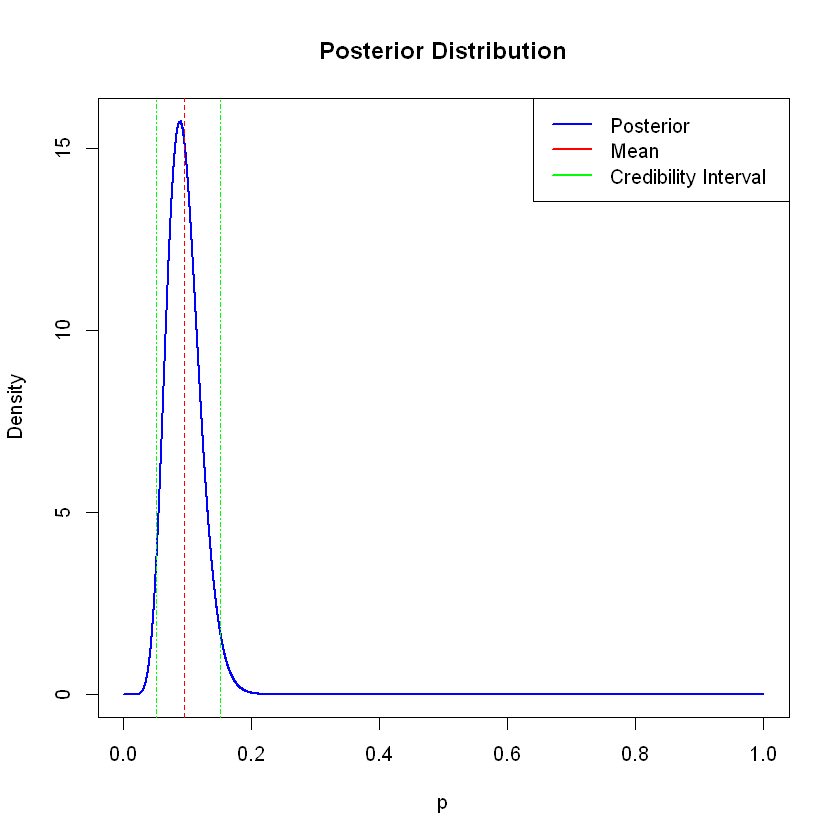

In [13]:
# Posterior parameters
alpha_post <- alpha + y
beta_post <- beta + n - y

# Bayesian estimator for p (posterior mean)
p_bayes <- alpha_post / (alpha_post + beta_post)

# Posterior variance
p_var <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))

# 95% credible interval
p_cred_int <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

# Output results
cat("Bayesian estimator for p (posterior mean):", p_bayes, "\n")
cat("Posterior variance:", p_var, "\n")
cat("95% credible interval:", p_cred_int, "\n")

# Plot the posterior distribution
plot(p, post, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution")
abline(v = p_bayes, lty = 2, col = "red")
abline(v = p_cred_int, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

### d)

Hypothesis test: bayesian approach

Posterior probability of null hypothesis:  61.42 %
Posterior probability of alternative hypothesis:  38.58 %
Cannot reject the null hypothesis.


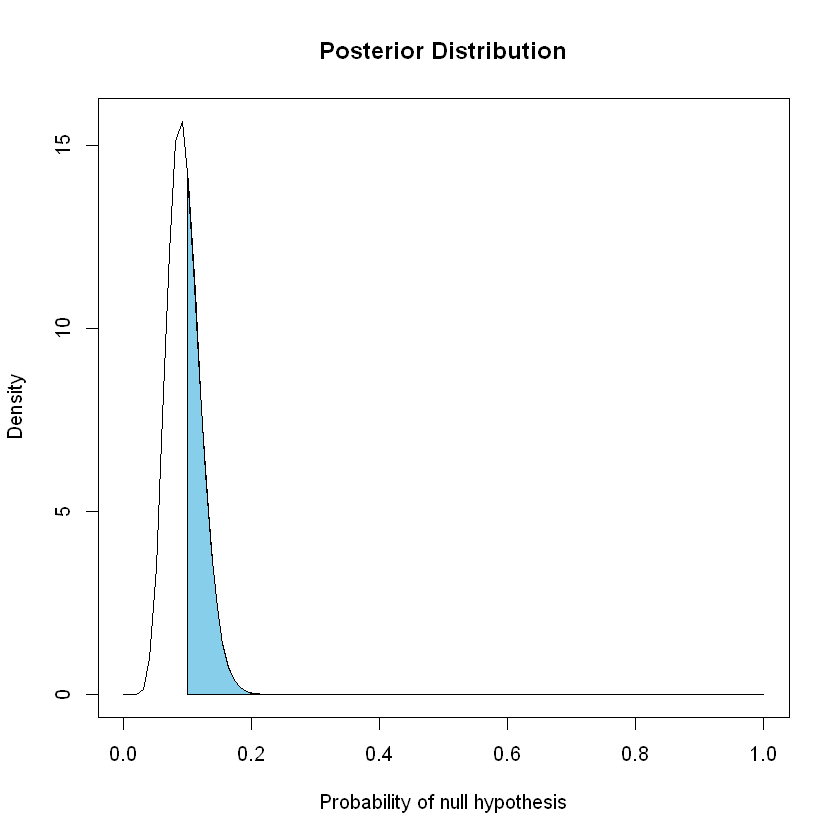

In [17]:
# Probability greater or equal to 10% = NULL hypothesis
null_posterior <- pbeta(0.1, shape1 = alpha_post, shape2 = beta_post)
alt_posterior <- 1 - null_posterior

# print results
cat(paste("Posterior probability of null hypothesis: ", round(null_posterior, 4)*100, "%\n"))
cat(paste("Posterior probability of alternative hypothesis: ", round(alt_posterior, 4)*100, "%\n"))

# Perform the hypothesis test with 5% level of significance
if (null_posterior <= 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Cannot reject the null hypothesis.\n")
}

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, alpha_post, beta_post)
plot(x, posterior, type = "l", main = "Posterior Distribution", xlab = "Probability of null hypothesis", ylab = "Density")

# Shade the critical region
crit_x <- seq(0.1, 1, length.out = 100)
crit_y <- dbeta(crit_x, alpha_post, beta_post)
polygon(c(crit_x, rev(crit_x)), c(rep(0, length(crit_x)), rev(crit_y)), col = "skyblue")

Hypothesis test: frequentist approach

The p-value of the test is 0.5043125 
Cannot reject the null hypothesis.


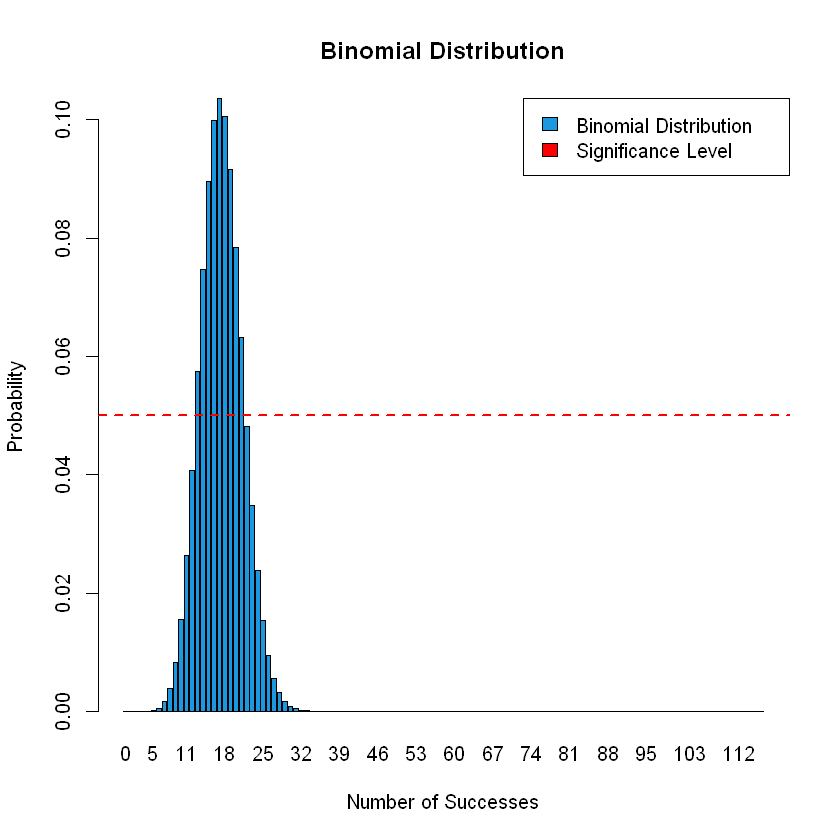

In [19]:
# Perform the binomial test
test_result <- binom.test(y, n, p = 0.1, alternative = "less")

# Report the result of the test
cat("The p-value of the test is", test_result$p.value, "\n")
if (test_result$p.value <= 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Cannot reject the null hypothesis.\n")
}

# Plot the binomial distribution
x <- 0:n
prob <- dbinom(x, n, 0.15)
barplot(prob, names.arg = x, main = "Binomial Distribution", col = "#1b98e0", xlab = "Number of Successes", ylab = "Probability")

# Add a horizontal line representing the significance level
abline(h = 0.05, col = "red", lwd = 2, lty = 'dashed')

legend("topright", legend = c("Binomial Distribution", "Significance Level"),
       fill = c("#1b98e0", "red"), lty = 0)

### e)

In [1]:
n <- 165
y <- 9
# probability (frequentist estimator) 
p <- y/n
cat("The frequentist estimation for p is:", p*100, "%")

The frequentist estimation for p is: 5.454545 %

### f)

In [23]:
install.packages('emdbook')

si installano anche le dipendenze 'bdsmatrix', 'mvtnorm', 'bbmle'




package 'bdsmatrix' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'bbmle' successfully unpacked and MD5 sums checked
package 'emdbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpgTMQIV\downloaded_packages


For first prior:
Posterior mean: 0.09448819 
Posterior variance: 0.008928018 
95% credible interval: 0.0467 0.1459 
For second prior (old):
Posterior mean: 0.09465021 
Posterior variance: 0.008958661 
95% credible interval: 0.0593 0.1319 


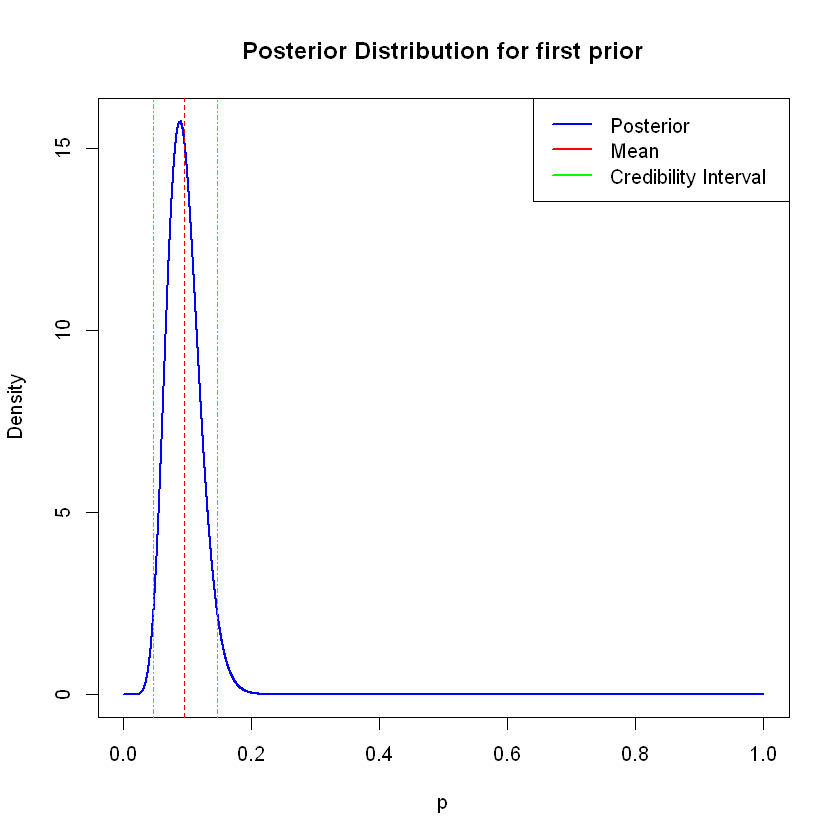

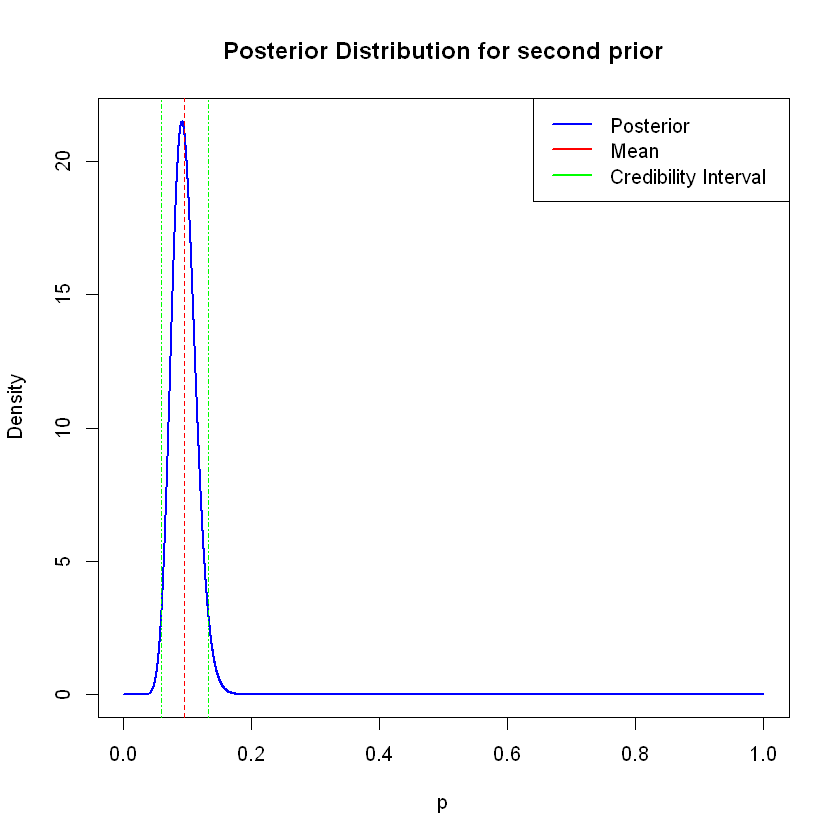

In [6]:
library(emdbook)
# Parameters
alpha <- 1
beta <- 10
step <- 0.0001
p <- seq(0, 1, by = step)

# Likelihood 
like <- dbinom(y, size=n, prob=p)

#Priors
prior <- dbeta(p, alpha, beta)
prior_old <- post

# Posteriors
post_unorm <- like*prior
post_beta <- post_unorm/(step * sum(post_unorm))

post_unorm_old <- like*prior_old
post_old <- post_unorm_old/(step * sum(post_unorm_old))

# Bayesian estimator
mean <- sum(p * post_beta)*step
var <- sum(((mean)^2)*post_beta)*step
cred_int <- ncredint(p, post_beta, level = 0.95)

mean_old <- sum(p * post_old)*step
var_old <- sum(((mean_old)^2)*post_old)*step
cred_int_old <- ncredint(p, post_old, level = 0.95)

# Output results
cat("For first prior:\n")
cat("Posterior mean:", mean, "\n")
cat("Posterior variance:", var, "\n")
cat("95% credible interval:", cred_int,"\n")

cat("For second prior (old):\n")
cat("Posterior mean:", mean_old, "\n")
cat("Posterior variance:", var_old, "\n")
cat("95% credible interval:", cred_int_old,"\n")

# Plot the first prior
plot(p, post_beta, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution for first prior")
abline(v = mean, lty = 2, col = "red")
abline(v = cred_int, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

# Plot the second prior
plot(p, post_old, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution for second prior")
abline(v = mean_old, lty = 2, col = "red")
abline(v = cred_int_old, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

### g)

Posterior mean: 0.05681818 
Posterior variance: 0.0003027677 
95% credible interval: 0.02773918 0.09538012 


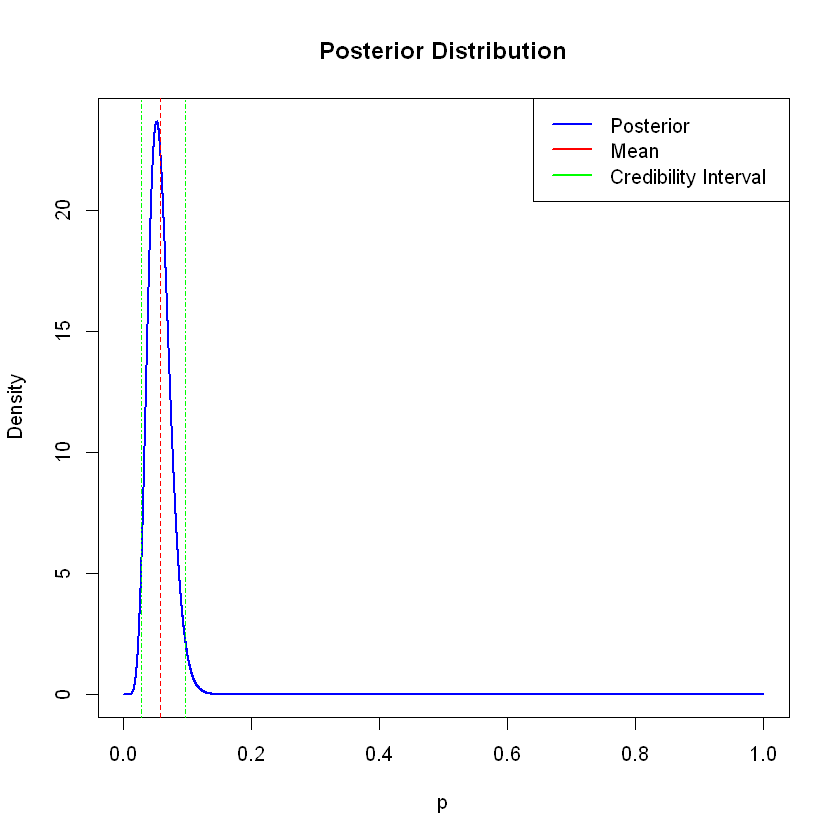

In [11]:
# Parameters
alpha <- 1
beta <- 10
n <- 165
y <- 9
step <- 0.0001
p <- seq(0, 1, by = step)

# Likelihood and prior
like <- dbinom(y, size=n, prob=p)
prior <- dbeta(p, alpha, beta)

# Posterior
post_unorm <- like*prior
post <- post_unorm/(step * sum(post_unorm))

# Posterior parameters
alpha_post <- alpha + y
beta_post <- beta + n - y

# Bayesian estimator for p (posterior mean)
p_bayes <- alpha_post / (alpha_post + beta_post)

# Posterior variance
p_var <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))

# 95% credible interval
p_cred_int <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

# Output results
cat("Posterior mean:", p_bayes, "\n")
cat("Posterior variance:", p_var, "\n")
cat("95% credible interval:", p_cred_int, "\n")

# Plot the posterior distribution
plot(p, post, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution")
abline(v = p_bayes, lty = 2, col = "red")
abline(v = p_cred_int, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

### h)

Hypothesis test: bayesian approach

Posterior probability of null hypothesis:  98.43 %
Posterior probability of alternative hypothesis:  1.57 %
Cannot reject the null hypothesis.


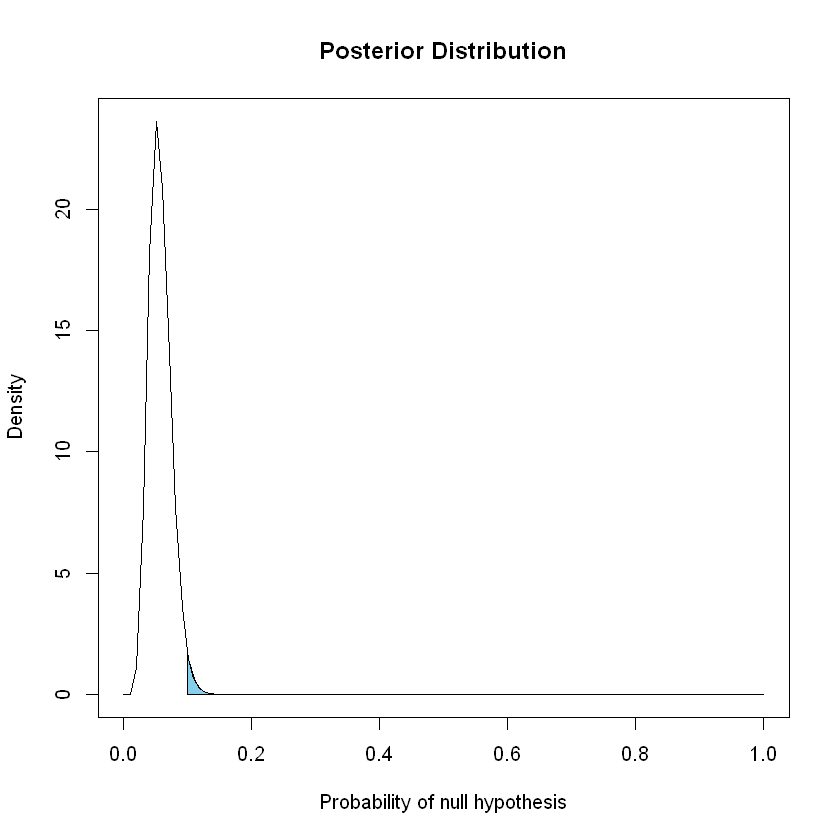

In [12]:
# Probability greater or equal to 10% = NULL hypothesis
null_posterior <- pbeta(0.1, shape1 = alpha_post, shape2 = beta_post)
alt_posterior <- 1 - null_posterior

# print results
cat(paste("Posterior probability of null hypothesis: ", round(null_posterior, 4)*100, "%\n"))
cat(paste("Posterior probability of alternative hypothesis: ", round(alt_posterior, 4)*100, "%\n"))

# Perform the hypothesis test with 5% level of significance
if (null_posterior <= 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Cannot reject the null hypothesis.\n")
}

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, alpha_post, beta_post)
plot(x, posterior, type = "l", main = "Posterior Distribution", xlab = "Probability of null hypothesis", ylab = "Density")

# Shade the critical region
crit_x <- seq(0.1, 1, length.out = 100)
crit_y <- dbeta(crit_x, alpha_post, beta_post)
polygon(c(crit_x, rev(crit_x)), c(rep(0, length(crit_x)), rev(crit_y)), col = "skyblue")

Hypothesis test: frequentist approach

The p-value of the test is 0.0274604 
Reject the null hypothesis.


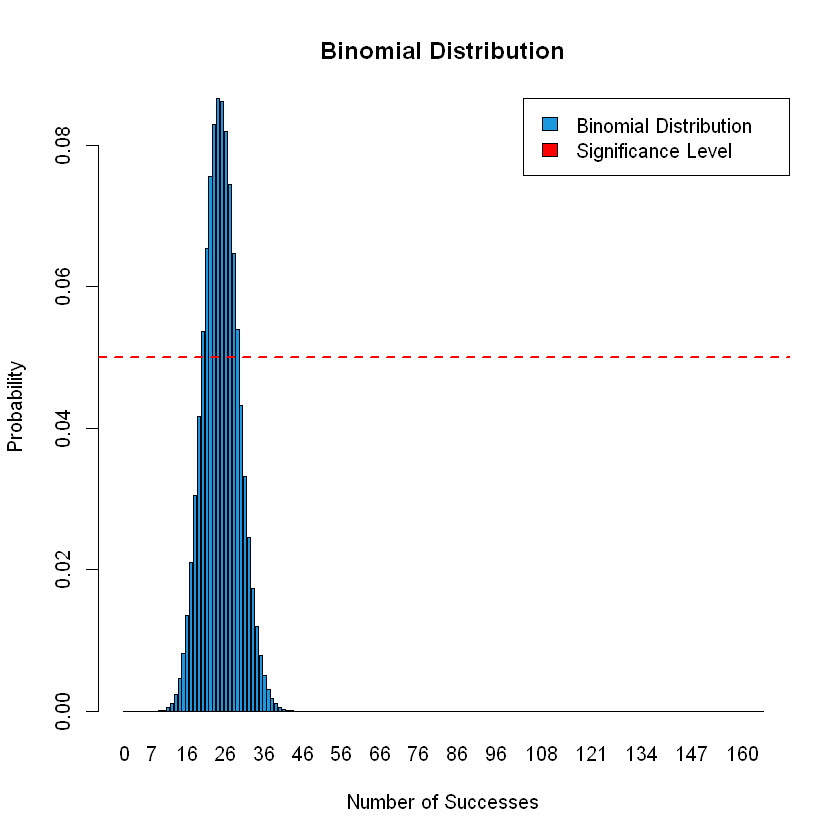

In [13]:
# Perform the binomial test
test_result <- binom.test(y, n, p = 0.1, alternative = "less")

# Report the result of the test
cat("The p-value of the test is", test_result$p.value, "\n")
if (test_result$p.value <= 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Cannot reject the null hypothesis.\n")
}

# Plot the binomial distribution
x <- 0:n
prob <- dbinom(x, n, 0.15)
barplot(prob, names.arg = x, main = "Binomial Distribution", col = "#1b98e0", xlab = "Number of Successes", ylab = "Probability")

# Add a horizontal line representing the significance level
abline(h = 0.05, col = "red", lwd = 2, lty = 'dashed')

legend("topright", legend = c("Binomial Distribution", "Significance Level"),
       fill = c("#1b98e0", "red"), lty = 0)

# Exercise 4

(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p|y)
(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model



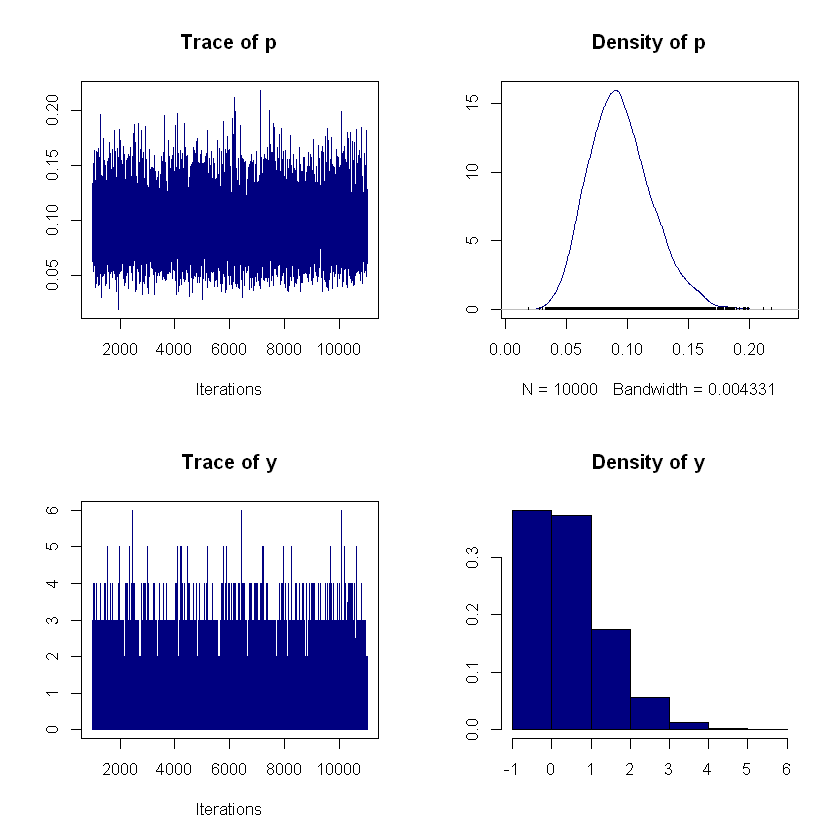

In [55]:
# Set the data
data <- NULL
data$x <- 11
data$n <- 116
data$n_next <- 10

# Define the JAGS model
model <- "model_4.txt"

# Initialize the model
jm <- jags.model(model, data)
update(jm, 1000)

# Run the MCMC simulation

chain <- coda.samples(jm, c('p','y'), n.iter = 10000)

#plot the chain
plot(chain, col='navy')

Bayesian estimator for p (posterior mean): 0.09451383 
Posterior variance: 0.000668914 
95% Credible Interval: 0.05005677 0.151419 


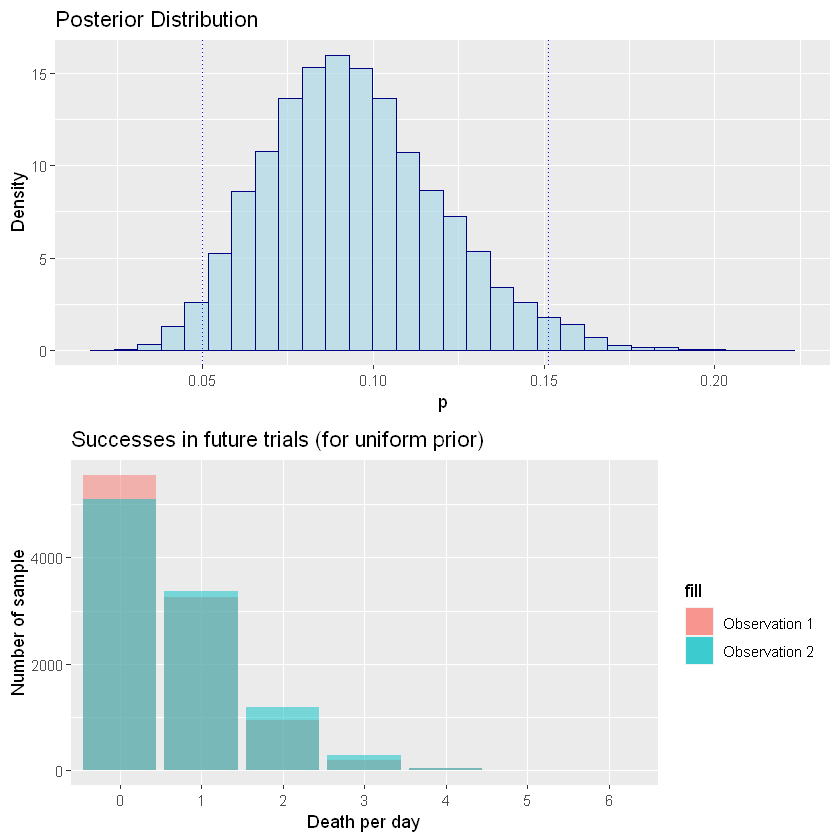

In [68]:
# Extract posterior samples
posterior_samples <- as.data.frame(as.mcmc(chain))

# Calculate posterior mean and variance
posterior_mean <- mean(posterior_samples$p)
posterior_variance <- var(posterior_samples$p)

# Calculate 95% credible interval
credible_interval <- quantile(posterior_samples$p, c(0.025, 0.975))

# Print results
cat("Bayesian estimator for p (posterior mean):",posterior_mean, "\n")
cat("Posterior variance:", posterior_variance, "\n")
cat("95% Credible Interval:", credible_interval, "\n")

# Plot the posterior distribution
ggplot()+
  geom_histogram(aes(x=posterior_samples$p, y = ..density..), bins = 30, fill = "lightblue", alpha =0.7, color = "navy") +
  geom_density(color = "red") +
  geom_vline(aes(xintercept = credible_interval[1]), linetype = "dotted", color = "blue") +
  geom_vline(aes(xintercept = credible_interval[2]), linetype = "dotted", color = "blue") +
  labs(x = "p", y = "Density", title = "Posterior Distribution") -> plot_inference

# Generate future predictions
ty <- as.data.frame(table(posterior_samples$y))
ggplot()+
geom_bar(aes(x = ty_1$Var1, y=ty_1$Freq, fill='Observation 1'), alpha=0.5, stat = 'identity')+
geom_bar(aes(x = ty_2$Var1, y=ty_2$Freq, fill='Observation 2'), alpha=0.5, stat = 'identity')+
labs(x='Death per day', y='Number of sample', 
     title=sprintf('Successes in future trials (for uniform prior)')) -> plot_prediction

grid.arrange(grobs=list(plot_inference, plot_prediction), nrow = 2)

As it can be seen, the results of the MCMC are the same of those computed in Exercise 3. 

In [69]:
summary(chain)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.09451 0.02586 0.0002586      0.0002586
y 0.95140 0.96246 0.0096246      0.0096246

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.05006 0.07606 0.09246 0.1106 0.1514
y 0.00000 0.00000 1.00000 1.0000 3.0000


In [6]:
system("jupyter nbconvert --to html ex_rlab05.ipynb")

[1] 0